**군집화 (Clustering)**
- 데이터 포인트들을 별개의 군집으로 그룹화
- 유사성이 높은 데이터들은 동일한 그룹으로 분류하고, 서로 다른 군집들은 상이성을 가지도록 군집화



**군집화 활용 분야**
- 고객, 마켓, 브랜드, 사회 경제 활동 세분화(특정 유형으로 분리)
- 이미지 검출, 세분화, 트랙킹
- 이상 검출


**군집화 알고리즘**
1. K-Means
  - centriod기반 알고리즘
  - 비즈니스적인 세분화 영역에서 많이 활용<br><br>
2. Mean Shift
  -  K-Means와는 다른 centriod기반 알고리즘<br><br>
3. Gaussian Mixture Model
  - 데이터 여러개의 정규분포로 구성되어있다고 가정하고 데이터 세트가 어느 정규분포에 속하는지에 따라 군집화 수행<br><br>
4. DBSCAN
 - 데이터의 밀도에 따라 군집화 수행

**장점**
  - 군집화에서 가장 많이 사용되는 알고리즘
  - 쉽고 간결
  - 대용량 데이터에도 사용 가능<BR><BR>


**단점**
    
  - 거리 기반 알고리즘이므로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐
    (이를 해결하기 위해 PCA로 차원 축소를 적용해야 할 수도)
  - 반복 수행시 횟수가 많을 경우 수행 시간이 느려짐
  - 이상치 데이터에 취약

**주요 파라미터**
- n_cluster: 군집화할 개수
- init = 'k-means++': centriod 초기화, default값
- max_iter: 최대 반복 횟수, 데이터 중심점의 이동이 더 이상 없으면 종료

**속성**
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심점 좌표 shape[군집 개수, 피처 개수]

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width']) # 피처들에만 칼럼명 부여
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### KMeans 객체를 생성하고 군집화 수행

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0) # 개별 데이터들이 centroid 변동이 한개 라도 있으면 계속 움직임 이것을 300번까지 함
kmeans.fit(irisDF)  # fit하면 군집화가 거의 모두 수행됨

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### 각 데이터 포인트들이 어떤 centroid에 할당되었는지 labels_속성을 통해 확인

In [4]:
print(kmeans.labels_)
irisDF.shape, kmeans.labels_.shape
# 각 데이터 포인트들 150개에 맞춰 centroid값이 할당됨 (0번 ~ 0앞 숫자 : centroid값 1 부여)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


((150, 4), (150,))

In [5]:
# prdict는 labels_속성만 반환함
print(kmeans.predict(irisDF))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### 만들어진 kmeans.labels_를 cluster칼럼으로 추가

In [6]:
irisDF['cluster']=kmeans.labels_

In [9]:
# 클러스터 레벨로 확인했을 때 타겟값 얼마나 맞는지, 실제 분류값과 얼마나 차이 나는지
irisDF['target'] = iris.target  # iris.target는 분류값
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

# cluster의 0,1,2는 임의로 매긴 것이라 타겟 인덱스 번호와 다름
# 0인 세토사는 1, 50으로 잘 분류됨
# 1인 versicolor는 50개 데이터 중 2개가 버지니카로 잘못 분류됨
# 2인 버지니카는 versicolor로 14개 분류됨

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


#### 2차원 평면에 데이터 포인트별로 군집화된 결과 시각화


#### 2차원 PCA값으로 각 데이터 차원축소
- iris데이터가 피처가 4개이므로 시각화하기 어려워 차원축소로 줄임

In [7]:
from sklearn.decomposition import PCA

# 2개의 피처를 transform
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]  # 첫번째 피처는 pca_x 칼럼에 할당
irisDF['pca_y'] = pca_transformed[:,1]  # 두번째 피처는 pca_y 칼럼에 할당
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,-2.888991,-0.144949


#### 시각화

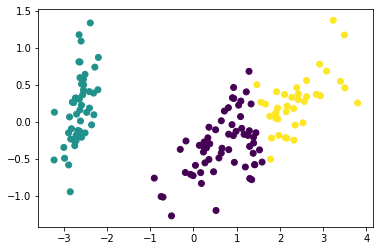

In [9]:
# pca_x를 x축, pca_y를 y축, 색깔은 cluster로 하면 군집별로 자동으로 설정됨
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster'])

# 노랑과 보라색이 조금 겹쳐있긴 하지만 어느정도 분류가 잘 됨

### Clustering 알고리즘 테스트를 위한 데이터 생성 
- 사이킷런에서는 다양한 클러스트 알고리즘 테스트를 위한 make_blobs 유틸리티 제공

- n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.<br><br>
- n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처 는 y 좌표상에 표현합니다.<br><br>
- centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군 집 중심점의 좌표를 의미합니다.<br><br>
- cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이 터가 표준편차 0.8을 가진 값으로 만들어집니다.
[0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭 니다.
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# X는 피처, y는 클러스터된 타겟값
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) 
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

#  클러스터 0,1,2 3개 생성되고 각각의 값은 67, 67, 66

(200, 2) (200,)
[0 1 2] [67 67 66]


#### 시각화를 위한 데이터프레임 생성

In [11]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])  # 피처1 ftr1, 피처2 ftr2로 데이터프레임 만듬
clusterDF['target'] = y  # 타겟값은 할당된 centroid를 의미
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


#### make_blob으로 만들어진 데이터 포인트들을 시각화

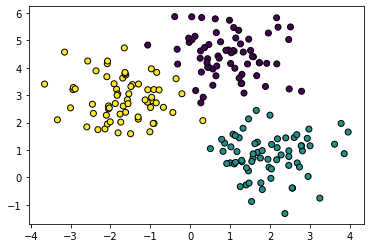

In [15]:
target_list = np.unique(y)

# x축은 ftr, y축은 ftr2, edgecolor는 마커 테두리, color는 노랑색
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )

#### K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화
- centroid기반 알고리즘은 centroid의 중심 위치를 알 수 있고 시각화 할 수 있음

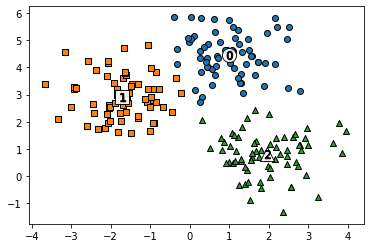

In [13]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

# centroid가 각 군집별 중심에 위치한 것 확인 가능

In [16]:
kmeans.cluster_centers_

# 1번째 클러스터 x축, y축 =[ 0.990103  ,  4.44666506]
# 2번째 클러스터 x축, y축 =[-1.70636483,  2.92759224]
# 3번째 클러스터 x축, y축 =[ 1.95763312,  0.81041752]

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [14]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

# target은 원래 샘플 데이터로 만든 것
# kmeans_label을 kmeans객체를 통해 만든 것

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
